In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MeanShift, DBSCAN

from sklearn.metrics.cluster import silhouette_score, adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score

In [139]:
penguins = sns.load_dataset('penguins')
penguins = penguins.sample(frac=1).reset_index(drop=True)

In [ ]:
# 펭귄의 bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g 를 가지고
# 스케일링 후 kmeans, meanshift, dbscan 으로 군집하자
# kmeans 는 최적의 k를 찾을 수 있도록 elbow graph 그리고, 실루엣 점수로 그래프 그린 후 k를 확정하여 학습하자.
# 각 모델의 ari, nmi, 실루엣 점수를 출력하자

In [141]:
df = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
df["target"] = penguins["species"].map(lambda x: 0 if x == "Adelie" else 1 if x == "Gentoo" else 2)

C:\Users\dongh\AppData\Local\Temp\ipykernel_30464\3301348123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"] = penguins["species"].map(lambda x: 0 if x == "Adelie" else 1 if x == "Gentoo" else 2)


In [142]:
df.isna().sum()

bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
target               0
dtype: int64

In [143]:
df.isnull().sum()

bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
target               0
dtype: int64

In [144]:
df.dropna(subset=["bill_length_mm"],inplace=True)
df.isna().sum()

C:\Users\dongh\AppData\Local\Temp\ipykernel_30464\3253013733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=["bill_length_mm"],inplace=True)


bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
target               0
dtype: int64

In [145]:
x = df.iloc[:, :-1]

In [146]:
x_scale = StandardScaler().fit_transform(x)

In [147]:
# k-means
inertia_list = list()
for i in range(1, 10):
    model = KMeans(n_clusters=i, n_init="auto", random_state=1)
    model.fit(x_scale)
    inertia_list.append(model.inertia_)

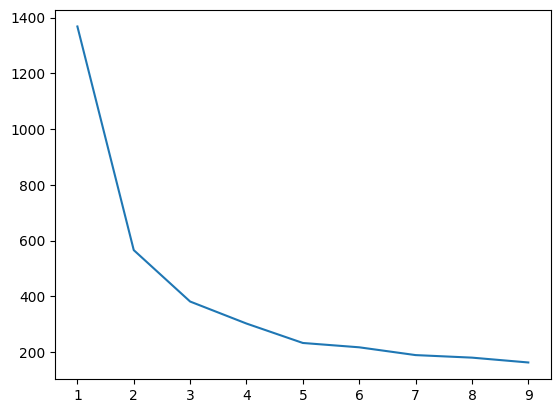

In [148]:
plt.plot(range(1, 10), inertia_list)

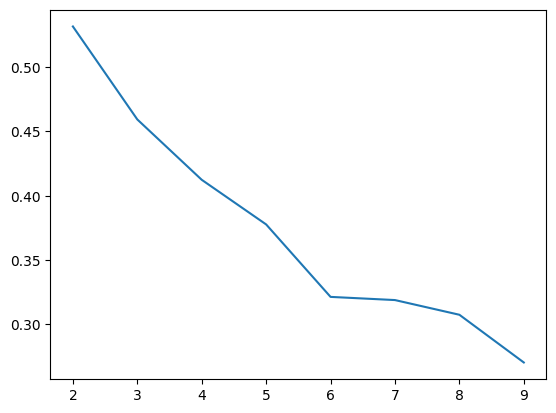

In [149]:
silhouette_score_list = list()
for i in range(2, 10):
    model = KMeans(n_clusters=i, n_init="auto", random_state=1)
    model.fit(x_scale)
    silhouette_score_list.append(silhouette_score(x_scale, model.labels_))

plt.plot(range(2, 10), silhouette_score_list)

In [150]:
model01 = KMeans(n_clusters=2)
model01.fit(x_scale)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [151]:
predict01 = model01.predict(x_scale)
predict01

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# 공식문서에서 bandwidth 기본값 확인!
# (estimate_bandwidth 사용함)
model02 = MeanShift()
model02.fit(x_scale)

,bandwidth,np.float64(1.77)
,seeds,None
,bin_seeding,False
,min_bin_freq,1
,cluster_all,True
,n_jobs,None
,max_iter,300


In [153]:
model02.labels_

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [154]:
predict02 = model02.predict(x_scale)
predict02

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [155]:
model03 = DBSCAN()
predict03 = model03.fit_predict(x_scale)
predict03

array([ 0,  1, -1,  0,  0,  0,  1,  2, -1,  0,  0,  2,  0,  2, -1,  1, -1,
        1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  0,  2, -1,  3,  1,  0,  0,
        0,  0,  0,  0, -1,  1,  1,  0,  2, -1, -1,  2, -1,  2,  1, -1, -1,
        0,  2, -1, -1,  3,  1,  2,  0,  2, -1,  1,  2,  1,  0,  1,  0,  0,
        1,  0,  1,  0,  1,  0,  1, -1,  0,  1,  3,  0,  2,  0,  1,  1,  0,
       -1, -1,  2,  0,  0,  0,  1, -1,  1,  1,  1,  2,  2,  1, -1,  0,  3,
        0,  0,  0, -1,  1,  0,  0,  0,  0,  2,  1,  3, -1,  0,  1,  0,  0,
        0,  2,  0,  1,  0,  0,  0,  1,  1,  0,  0,  1,  1,  1,  1,  2,  0,
        0,  0,  1,  0, -1, -1,  1, -1,  1,  0,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  0,  1,  0,  0,  3,  0,  0,  1,  0, -1,  1,  0,  1,  3,  0,
        1,  1,  1, -1,  1,  2,  0,  0,  0, -1,  1,  0,  0, -1, -1, -1,  1,
        0,  1, -1,  1, -1,  0,  1,  3,  1,  1,  1,  0,  1,  1,  0,  1,  2,
       -1, -1, -1,  0,  1,  1,  0,  1,  0,  0,  1, -1,  1,  1, -1,  0,  1,
        1,  0,  3,  0,  0

In [156]:
df["k-means"] = predict01
df["meanshift"] = predict02
df["dbscan"] = predict03
df

C:\Users\dongh\AppData\Local\Temp\ipykernel_30464\3631874147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["k-means"] = predict01
C:\Users\dongh\AppData\Local\Temp\ipykernel_30464\3631874147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["meanshift"] = predict02
C:\Users\dongh\AppData\Local\Temp\ipykernel_30464\3631874147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,target,k-means,meanshift,dbscan
0,39.2,18.6,190.0,4250.0,0,0,0,0
1,50.1,15.0,225.0,5000.0,1,1,1,1
2,33.1,16.1,178.0,2900.0,0,0,0,-1
3,41.1,19.0,182.0,3425.0,0,0,0,0
4,40.6,18.6,183.0,3550.0,0,0,0,0
...,...,...,...,...,...,...,...,...
339,49.8,16.8,230.0,5700.0,1,1,1,1
340,48.4,16.3,220.0,5400.0,1,1,1,1
341,52.2,17.1,228.0,5400.0,1,1,1,1
342,46.2,14.4,214.0,4650.0,1,1,1,1


In [157]:
ari = list()
nmi = list()
silhouette = list()

# models = [model01, model02, model03, model04]

for predict in df.iloc[:,5:]:
    ari.append(adjusted_rand_score(df["target"], df[predict]))
    nmi.append(normalized_mutual_info_score(df["target"], df[predict]))
    try:
        silhouette.append(silhouette_score(df.iloc[:, :4], df[[predict]]))
    except:
        # d실루엣 계수는 1개 이상으로 클러스터링 되어야 함 (meanshift에서 error)
        silhouette.append(0)


c:\Users\dongh\miniconda3\envs\multi02\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dongh\miniconda3\envs\multi02\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dongh\miniconda3\envs\multi02\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [158]:
metrics_df = pd.DataFrame(df.iloc[:,5:].columns, columns=["model"])

metrics_df["ari"] = ari
metrics_df["nmi"] = nmi
metrics_df["silhouette"] = silhouette

In [159]:
metrics_df
# 실루엣계수가 음수 : 군집의 결과가 잘못됨 (같은 그룹보다 다른 그룹이 더 가까움을 의미)

,model,ari,nmi,silhouette
0,k-means,0.655066,0.767077,0.554635
1,meanshift,0.646442,0.704589,0.554228
2,dbscan,0.663770,0.663655,-0.094098


In [160]:
from sklearn.decomposition import PCA

In [161]:
x_pca = PCA(n_components=2).fit_transform(x)

In [162]:
df[["x01", "x02"]] = x_pca
df

C:\Users\dongh\AppData\Local\Temp\ipykernel_30464\3127048994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["x01", "x02"]] = x_pca
C:\Users\dongh\AppData\Local\Temp\ipykernel_30464\3127048994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["x01", "x02"]] = x_pca


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,target,k-means,meanshift,dbscan,x01,x02
0,39.2,18.6,190.0,4250.0,0,0,0,0,48.052011,-12.685275
1,50.1,15.0,225.0,5000.0,1,1,1,1,798.540819,12.275960
2,33.1,16.1,178.0,2900.0,0,0,0,-1,-1301.983599,-4.346445
3,41.1,19.0,182.0,3425.0,0,0,0,0,-776.959375,-6.658760
4,40.6,18.6,183.0,3550.0,0,0,0,0,-651.961355,-7.807443
...,...,...,...,...,...,...,...,...,...,...
339,49.8,16.8,230.0,5700.0,1,1,1,1,1498.525999,5.681096
340,48.4,16.3,220.0,5400.0,1,1,1,1,1198.405823,0.572335
341,52.2,17.1,228.0,5400.0,1,1,1,1,1198.542490,9.246529
342,46.2,14.4,214.0,4650.0,1,1,1,1,448.401633,6.249195


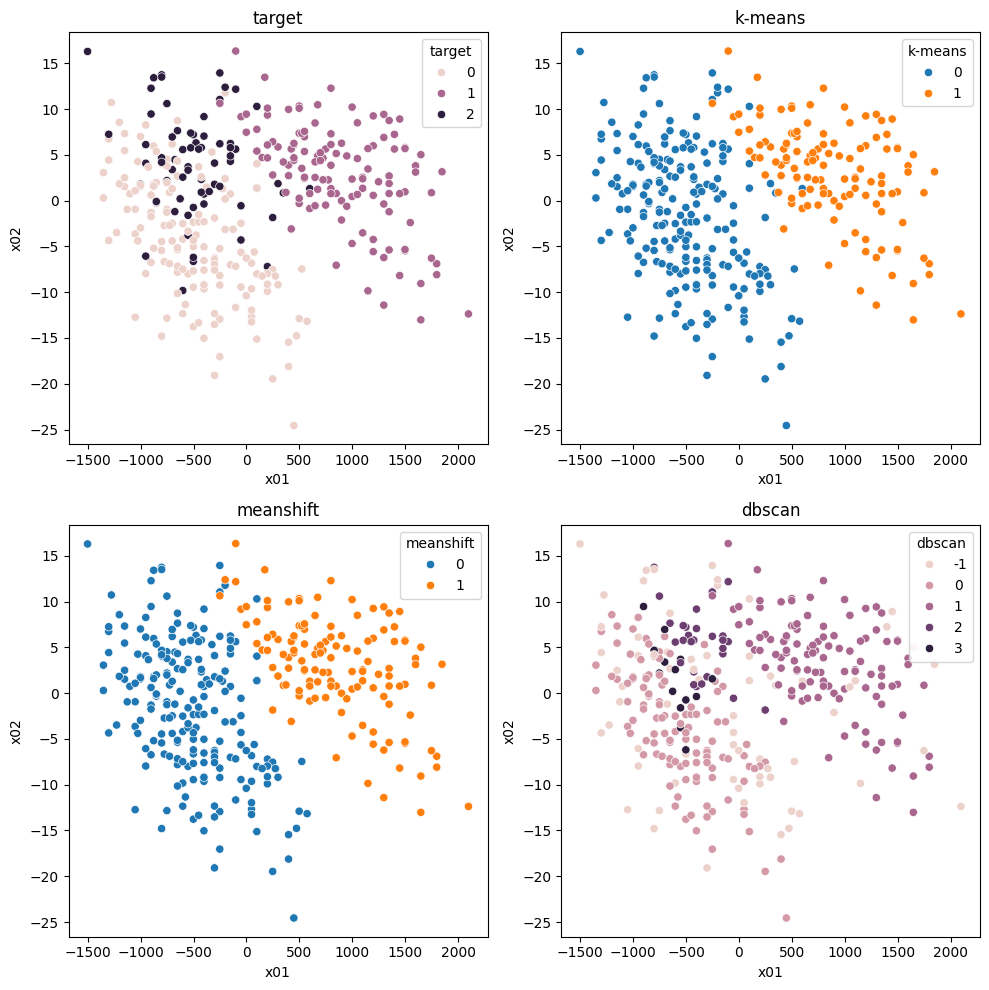

In [163]:
plt.figure(figsize=(10, 10))
for idx, predict in enumerate(df.iloc[:,4:8]):
    plt.subplot(2, 2, idx+1)
    sns.scatterplot(data=df, x="x01", y="x02", hue=predict)
    plt.title(predict)

plt.tight_layout()
plt.show()